# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from ml.visualization import plot_confusion_matrix, plot_learning_curve

np.random.seed(0)  # Para mayor determinismo

%matplotlib inline

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
print(type(dataset["TARGET"]))

<class 'pandas.core.series.Series'>


In [3]:
X_train.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000
mean,19019.487525,76396.345920,107329.562374,8.948753,0.186109,0.326365,179.558267,1.140931,21.859069,34.538331
std,10755.943240,45995.563918,55261.111710,7.577317,0.696353,0.925001,85.433422,1.683761,9.452400,9.566838
min,1700.000000,5627.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,12050.000000,48717.500000,71156.000000,3.000000,0.000000,0.000000,116.439339,0.000000,16.000000,29.293916
50%,17000.000000,67389.000000,94504.000000,7.000000,0.000000,0.000000,174.506408,1.000000,21.000000,35.302774
75%,23700.000000,94648.500000,124155.500000,13.000000,0.000000,0.000000,233.763633,2.000000,27.000000,39.200625
max,89800.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,11.000000,65.000000,144.189001


In [5]:
y_train.describe()

count    1483.000000
mean        0.169252
std         0.375100
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TARGET, dtype: float64


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?

El conjunto de datos se refiere a 1189 préstamos, para los cuales se registraron 12 variables que los caracterizan, 11 de las cuales son predictoras y la restante es la variable a predecir.

2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable objetivo es BAD. La misma es una variable dicotómica que asume el valor 1 si el préstamo no es devuelto y 0 en caso contrario.

3. ¿Qué información (atributos) hay disponible para hacer la predicción?

Las variables explicativas sin traducir son: 

* LOAN: Amount of the loan request
* MORTDUE: Amount due on existing mortgage
* VALUE: Value of current property
* REASON: DebtCon = debt consolidation; HomeImp = home improvement
* JOB: Occupational categories
* YOJ: Years at present job
* DEROG: Number of major derogatory reports
* DELINQ: Number of delinquent credit lines
* CLAGE: Age of oldest credit line in months
* NINQ: Number of recent credit inquiries
* CLNO: Number of credit lines

4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

La variable DEROG puede ser una buena clasificadora porque los reportes negativos entiendo que indican problemas en la capacidad de repago. Por el mismo motivo, probablemente sean importantes las variables REASON (consolidadcion de deuda debería implicar menor probabilidad de repago), JOB (ciertos trabajos pueden implicar mayor estabilidad de los ingresos), YOJ(mayor antiguedad implicaría mayor estabilidad de ingresos). 
En el caso de las variables DELINQ, CLAGE, NINQ, CLNO, MORTDUE, LOAN, VALUE, no es del todo claro el posible comportamiento, pero eso no implica que no puedan tener poder discriminatorio.

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1232
           1       0.00      0.00      0.00       251

   micro avg       0.83      0.83      0.83      1483
   macro avg       0.42      0.50      0.45      1483
weighted avg       0.69      0.83      0.75      1483




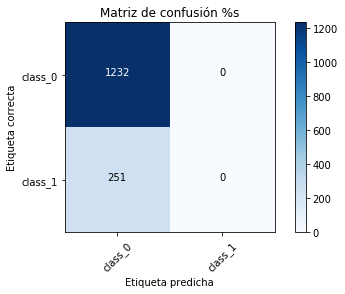

In [23]:
# Desempeño en conjunto de entrenamiento
model = SGDClassifier()
model.fit(X_train, y_train)
y_true, y_pred = y_train, model.predict(X_train)
print(classification_report(y_true, y_pred), end="\n\n")
plot_confusion_matrix(confusion_matrix(y_true, y_pred), 
                      classes=['class_0', 'class_1'], title="Matriz de confusión %s")

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.85      1.00      0.91       313
           1       0.50      0.02      0.03        58

   micro avg       0.84      0.84      0.84       371
   macro avg       0.67      0.51      0.47       371
weighted avg       0.79      0.84      0.78       371




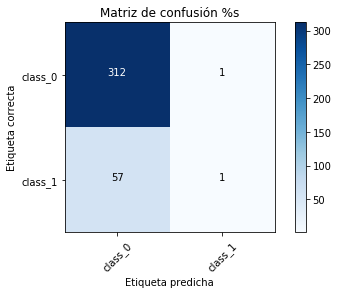

In [24]:
# Desempeño en conjunto de test
model = SGDClassifier()
model.fit(X_train, y_train)
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")
plot_confusion_matrix(confusion_matrix(y_true, y_pred), 
                      classes=['class_0', 'class_1'], title="Matriz de confusión %s")

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploración de hiperparámetros para función de coste "hinge"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.829 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.703 (+/-0.063) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.732 (+/-0.016) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.461 (+/-0.091) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.516 (+/-0.086) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.570 (+/-0.102) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.806 (+/-0.002) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.568 (+/-0.104) para los parámetros {'alpha': 0.001, 'eta0': 0.01,

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploración de hiperparámetros para función de coste "log"

Mejor conjunto de parámetros:
{'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.741 (+/-0.031) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.700 (+/-0.069) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.699 (+/-0.068) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.755 (+/-0.021) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.819 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.717 (+/-0.051) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.699 (+/-0.070) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.819 (+/-0.001) para los parámetros {'alpha': 0.001, 'eta0': 0.01

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploración de hiperparámetros para función de coste "perceptron"

Mejor conjunto de parámetros:
{'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.699 (+/-0.069) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.701 (+/-0.068) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.698 (+/-0.070) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.808 (+/-0.002) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.701 (+/-0.067) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.690 (+/-0.068) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.703 (+/-0.066) para los parámetros {'alpha': 0.001, 'eta0'

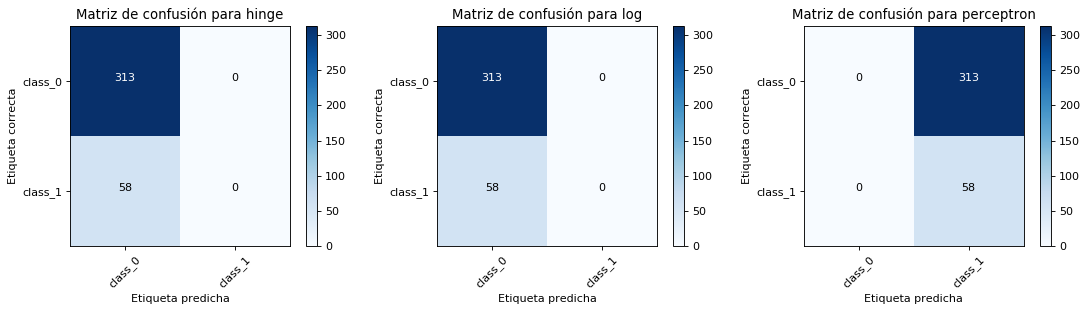

In [27]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, loss in enumerate(('hinge', 'log', 'perceptron'), start=1):
    exploring_params = {
        'learning_rate': ['constant'],
        'eta0': [0.1, 0.01, 0.001],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001]  # Tasa de regularización
    }
    m = SGDClassifier(loss=loss, tol=1e-3)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros para función de coste \"%s\"" % loss, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

    plt.subplot(1, 3, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=['class_0', 'class_1'], title="Matriz de confusión para %s" % loss)

## Ejercicio 3: Árbol de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

   micro avg       1.00      1.00      1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483




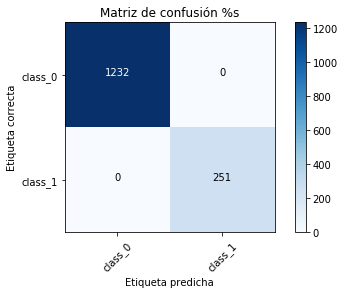

In [31]:
# Desempeño en conjunto de entrenamiento
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_true, y_pred = y_train, model.predict(X_train)
print(classification_report(y_true, y_pred), end="\n\n")
plot_confusion_matrix(confusion_matrix(y_true, y_pred), 
                      classes=['class_0', 'class_1'], title="Matriz de confusión %s")

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.64      0.64      0.64        58

   micro avg       0.89      0.89      0.89       371
   macro avg       0.79      0.79      0.79       371
weighted avg       0.89      0.89      0.89       371




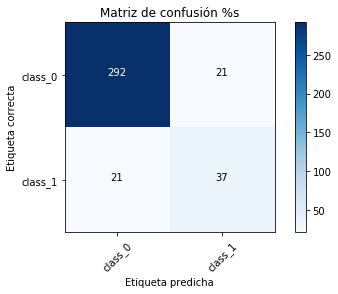

In [32]:
# Desempeño en conjunto de test
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")
plot_confusion_matrix(confusion_matrix(y_true, y_pred), 
                      classes=['class_0', 'class_1'], title="Matriz de confusión %s")

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
#DecisionTreeClassifier(criterion=’gini’, splitter=’best’, 
#                       max_depth=None, min_samples_split=2, 
#                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                       max_features=None, random_state=None, max_leaf_nodes=None, 
#                       min_impurity_decrease=0.0, min_impurity_split=None, 
#                       class_weight=None, presort=False)
# probar diferentes criterios de partición (criterion), 
#profundidad máxima del árbol (max_depth), 
#y cantidad mínima de samples por hoja (min_samples_leaf).

# Exploración de hiperparámetros para el criterio "gini"

Mejor conjunto de parámetros:
{'max_depth': 6, 'min_samples_leaf': 10}

Puntajes de la grilla:

Exactitud: 0.869 (+/-0.000) para los parámetros {'max_depth': 1, 'min_samples_leaf': 10}
Exactitud: 0.869 (+/-0.000) para los parámetros {'max_depth': 1, 'min_samples_leaf': 20}
Exactitud: 0.869 (+/-0.000) para los parámetros {'max_depth': 1, 'min_samples_leaf': 30}
Exactitud: 0.869 (+/-0.000) para los parámetros {'max_depth': 1, 'min_samples_leaf': 40}
Exactitud: 0.871 (+/-0.000) para los parámetros {'max_depth': 1, 'min_samples_leaf': 50}
Exactitud: 0.873 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 10}
Exactitud: 0.869 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 20}
Exactitud: 0.869 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 30}
Exactitud: 0.869 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 40}
Exactitud: 0.871 (+/-0.000) para los parámetr

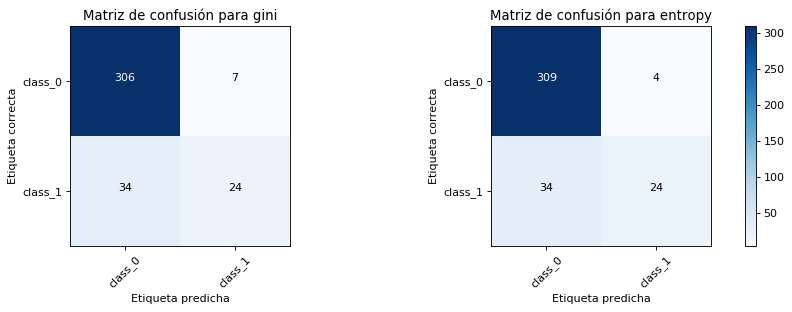

In [35]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, criterion in enumerate(('gini', 'entropy'), start=1):
    exploring_params = {
        
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  
        'min_samples_leaf': [10, 20, 30, 40, 50]  
    }
    m = DecisionTreeClassifier(criterion=criterion)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros para el criterio \"%s\"" % criterion, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

    plt.subplot(1, 2, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=['class_0', 'class_1'], title="Matriz de confusión para %s" % criterion)